In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms

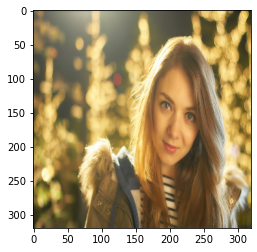

In [38]:
image_path = 'man2.jpg'
img = cv2.imread(image_path)
img = img[...,::-1] #BGR->RGB
h,w,_ = img.shape
img = cv2.resize(img,(320,320))

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
model = model.to(device)
model.eval();

In [18]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0).to(device)

<Figure size 432x288 with 0 Axes>

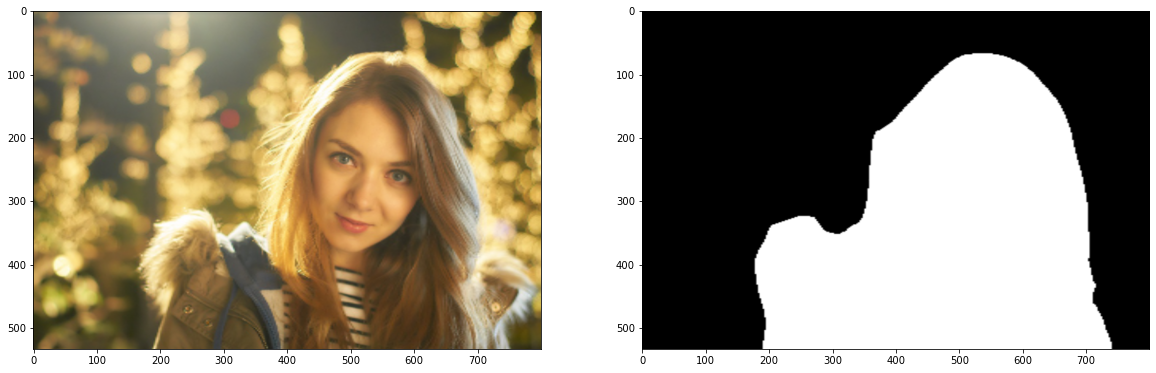

In [19]:
with torch.no_grad():
    output = model(input_batch)['out'][0]
output = output.argmax(0)
mask = output.byte().cpu().numpy()
mask = cv2.resize(mask,(w,h))
img = cv2.resize(img,(w,h))
plt.gray()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(mask);

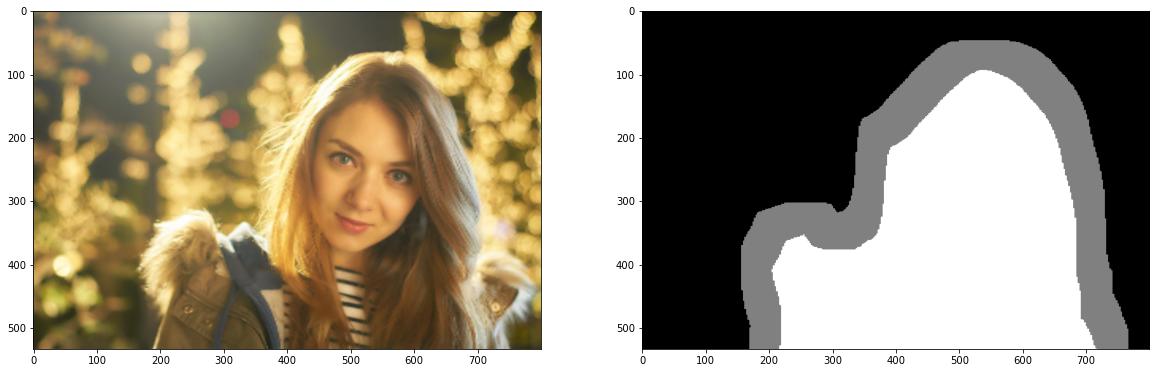

In [6]:
def gen_trimap(mask,k_size=(5,5),ite=1):
    kernel = np.ones(k_size,np.uint8)
    eroded = cv2.erode(mask,kernel,iterations = ite)
    dilated = cv2.dilate(mask,kernel,iterations = ite)
    trimap = np.full(mask.shape,128)
    trimap[eroded >= 1] = 255
    trimap[dilated == 0] = 0
    return trimap




trimap = gen_trimap(mask,k_size=(10,10),ite=5)
cv2.imwrite('men.png',trimap)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(trimap)


In [7]:
trimap.shape

(533, 800)

In [8]:
img.shape

(533, 800, 3)